In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime as dat

In [18]:
# 1. Fetch historical data
crypto = 'BTC-USD' 
end = dat.datetime.now()
start = end - dat.timedelta(days=365)  # Fetch data for the last year
data = yf.download(tickers = crypto, start=start, end=end, interval='1d')

/var/folders/ck/j26tby551231jzzyzr1y09mr0000gn/T/ipykernel_9386/1663454757.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers = crypto, start=start, end=end, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [19]:
# Inspect the data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-06-14,66011.093750,67294.648438,65056.894531,66747.570312,27403884779
2024-06-15,66191.000000,66402.187500,65871.773438,66006.742188,14121265576
2024-06-16,66639.046875,66894.843750,66018.250000,66189.359375,13281140541
2024-06-17,66490.296875,67188.320312,65094.964844,66636.515625,30006354476
2024-06-18,65140.746094,66556.703125,64066.957031,66490.976562,39481285950


In [20]:
# 2. Calculate log returns
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1)) # assuming log returns are normally distributed

In [21]:
# 3. Estimate the parameters
mu = data['Log Returns'].mean()  # Mean of returns
sigma = data['Log Returns'].std()  # Standard deviation of returns

In [22]:
# 4. Monte Carlo Simulation initical conditions
S0 = data['Close']['BTC-USD'].iloc[-1]  # Starting price (current price)
T = 365  # Number of days to simulate
simulations = 1000  # Number of simulations
dt = 1  # Time step (1 day)
np.random.seed(42)  # For reproducibility
print(S0)

104479.6796875


In [23]:
# 5. Run Monte Carlo Simulation
simulated_prices = np.zeros((T, simulations))
simulated_prices[0] = S0

In [24]:
for t in range(1, T):
    Z = np.random.standard_normal(simulations)  # Random numbers from standard normal
    simulated_prices[t] = simulated_prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z) # Discrete Geometric Brownian Motion formula

In [25]:
simulated_pricesdf = pd.DataFrame(simulated_prices)

In [26]:
simulated_pricesdf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,...,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688,104479.679688
1,105934.401058,104200.842293,106350.803218,108797.539972,103941.531892,103941.576235,108956.490241,106682.238593,103307.890970,106060.675853,...,105143.679650,99172.303781,103906.361209,102738.992755,101889.208095,103814.809938,109576.796484,106331.886792,103035.231308,106143.449984
2,109958.443152,106833.023812,106613.801598,107082.391156,105942.043132,105106.490682,111623.377254,108557.494080,106261.883313,104692.106135,...,107452.267068,101228.398348,107265.199857,104743.792457,102918.638242,106840.465429,109602.138090,104018.649553,102694.041864,104204.537672
3,108145.601220,106530.591117,104537.142533,106326.718284,100948.172896,105787.972862,111729.661668,106374.765638,108197.412218,107372.784820,...,111873.684194,102919.352068,107565.130850,104263.720854,100496.577522,107154.364999,110440.282070,100808.594271,103685.058753,103880.550147
4,103009.863114,104271.240469,103514.877499,111775.043434,102512.997784,102273.941489,113253.899949,102276.740868,111387.089465,106163.995952,...,107167.990507,101760.331585,102276.930009,106416.546868,95333.679463,107332.373854,104731.891051,100065.113477,108308.255811,104955.186483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,420509.365336,248338.959751,108811.908695,207305.961101,190395.123988,83353.754677,262264.189335,166371.978048,134735.006589,242825.467942,...,180639.755025,110993.859076,227600.234339,269009.711414,359619.258101,135611.941423,178422.868970,102827.124136,180825.106002,94467.740943
361,421748.752353,247896.601983,108384.308571,200100.568281,188619.596317,84700.711846,258727.596043,167175.435219,141240.684031,258233.928400,...,181278.419751,115248.417408,243865.986232,273309.565967,372977.591560,133165.031170,183213.362532,99736.500464,178596.914125,91880.501266
362,418539.051287,242750.762104,106273.866314,195063.093546,198711.369001,85070.670159,258521.538132,166677.322055,142478.430718,252420.885350,...,185696.558348,121284.966381,246901.935941,266837.686198,374308.913582,134531.194563,183578.358359,104458.990801,190558.067814,91604.470548
363,424420.789705,243779.262711,108667.627250,196048.872655,198480.530044,87571.786331,249368.323009,166797.510558,147023.927858,257814.209583,...,195759.103300,126859.371233,247304.378893,266802.958323,382204.062412,132791.747240,184027.939158,102775.071919,199577.101590,91514.098153


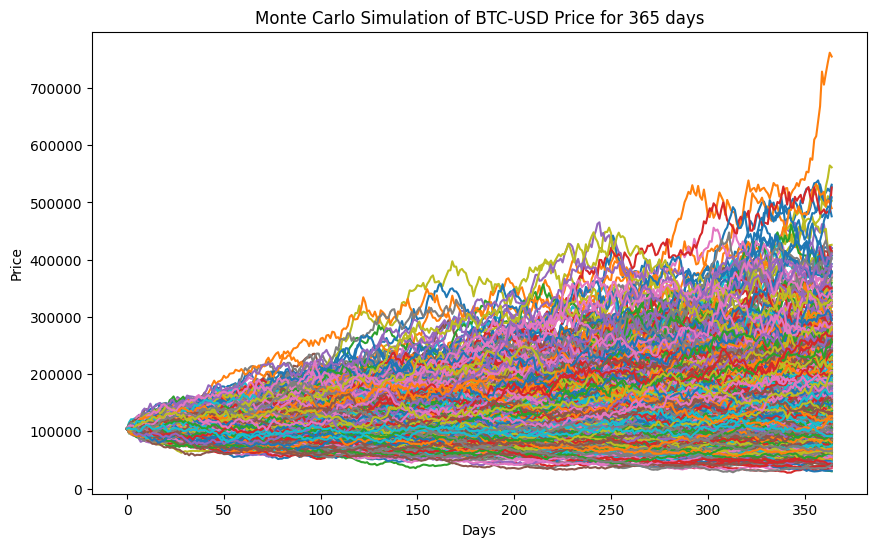

In [27]:
# 6. Plot the simulation results
plt.figure(figsize=(10,6))
plt.plot(simulated_prices)
plt.title(f"Monte Carlo Simulation of {crypto} Price for {T} days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [28]:
# 7. Analyze the results (e.g., mean, quantiles)
final_prices = simulated_prices[-1]
mean_price = np.mean(final_prices)
quantiles = np.percentile(final_prices, [5, 50, 95])

In [31]:
print(f"Mean simulated price after {T} days: {mean_price}")
print(f"5th percentile: {quantiles[0]}, Median: {quantiles[1]}, 95th percentile: {quantiles[2]}")
print(np.std(final_prices))
print(f"Expected return after one year {mean_price/S0}")

Mean simulated price after 365 days: 164550.30929467463
5th percentile: 63418.51567650701, Median: 146768.6520715534, 95th percentile: 328486.39821963495
85142.68146727367
Expected return after one year 1.5749503615138045


(array([16., 18., 51., 77., 80., 91., 87., 77., 70., 62., 62., 46., 56.,
        26., 41., 27., 22., 18.,  9.,  8.,  8.,  9.,  6.,  8.,  4.,  4.,
         7.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 30154.38455877,  44651.76982497,  59149.15509118,  73646.54035739,
         88143.92562359, 102641.3108898 , 117138.69615601, 131636.08142221,
        146133.46668842, 160630.85195463, 175128.23722083, 189625.62248704,
        204123.00775325, 218620.39301946, 233117.77828566, 247615.16355187,
        262112.54881808, 276609.93408428, 291107.31935049, 305604.7046167 ,
        320102.0898829 , 334599.47514911, 349096.86041532, 363594.24568152,
        378091.63094773, 392589.01621394, 407086.40148015, 421583.78674635,
        436081.17201256, 450578.55727877, 465075.94254497, 479573.32781118,
        494070.71307739, 508568.09834359, 523065.4836098 , 537562.86887601,
        552060.25414221, 566557.

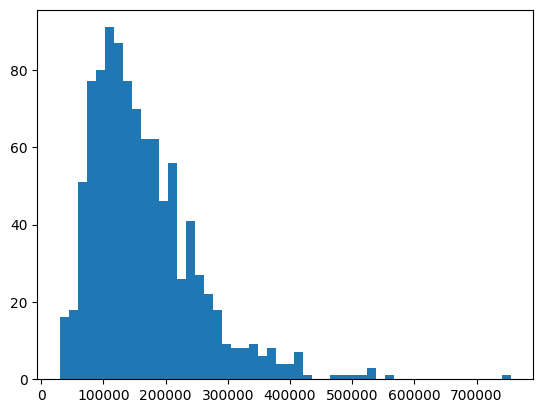

In [36]:
plt.hist(final_prices, bins = 50)

In [37]:
def kurtosis(X):
    mean = np.mean(X)
    EN=1/len(X)
    a=0
    b=0
    for x in X:
        a += (x-mean)**4
        b += (x-mean)**2
    b = (EN * b)**2
    return EN*a/b


In [39]:
print(f"Kurtosis: {kurtosis(final_prices)}")

Kurtosis: 7.090423449374256
